In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
dataset = pd.read_csv('SunPharma_3.csv',index_col="Date",parse_dates=True)


In [3]:
dataset.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-18,869.700012,876.500000,858.099976,870.450012,840.284668,2342525.0
2016-02-19,870.400024,870.400024,857.000000,864.200012,834.251343,1561649.0
2016-02-22,871.950012,885.799988,868.000000,882.450012,851.868835,2302969.0
2016-02-23,884.700012,898.450012,866.250000,871.099976,840.912170,2470030.0
2016-02-24,866.349976,870.000000,849.599976,854.549988,824.935608,1716644.0


In [4]:
dataset.isna().any()

Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2016-02-18 to 2021-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   float64
dtypes: float64(6)
memory usage: 67.5 KB


In [6]:
dataset = dataset.drop(['Adj Close'], axis = 1)
dataset.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-18,869.700012,876.500000,858.099976,870.450012,2342525.0
2016-02-19,870.400024,870.400024,857.000000,864.200012,1561649.0
2016-02-22,871.950012,885.799988,868.000000,882.450012,2302969.0
2016-02-23,884.700012,898.450012,866.250000,871.099976,2470030.0
2016-02-24,866.349976,870.000000,849.599976,854.549988,1716644.0


In [7]:
dataset.isna().any()

Open      True
High      True
Low       True
Close     True
Volume    True
dtype: bool

In [8]:
dataset = dataset.dropna()

In [9]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

<AxesSubplot:xlabel='Date'>

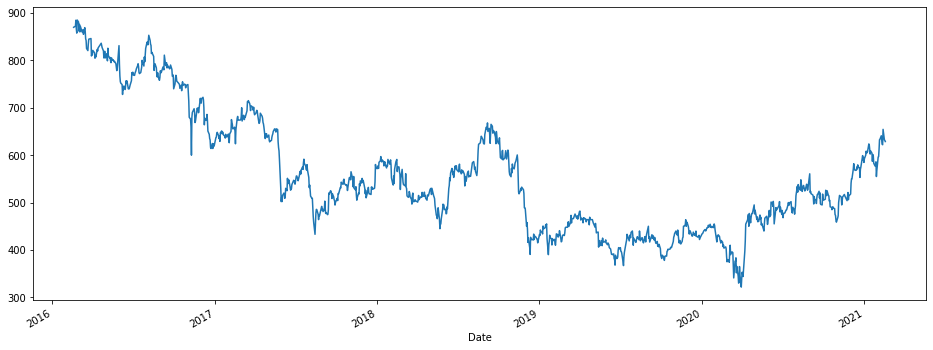

In [10]:
dataset['Open'].plot(figsize=(16,6))

In [11]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-18,NaN,NaN,NaN,NaN,NaN
2016-02-19,NaN,NaN,NaN,NaN,NaN
2016-02-22,NaN,NaN,NaN,NaN,NaN
2016-02-23,NaN,NaN,NaN,NaN,NaN
2016-02-24,NaN,NaN,NaN,NaN,NaN
2016-02-25,NaN,NaN,NaN,NaN,NaN
2016-02-26,872.221435,881.592861,860.514274,870.000000,2.385905e+06
2016-02-29,873.807146,882.207145,857.028565,867.635716,2.557886e+06
2016-03-01,872.564287,882.578570,856.214277,868.235718,2.671084e+06


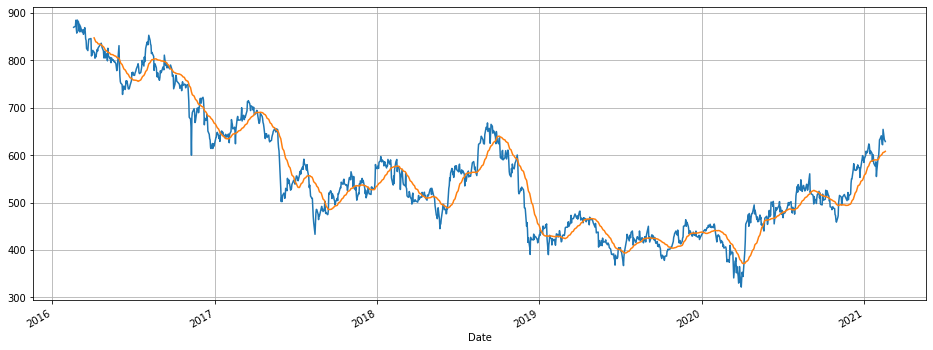

In [12]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()
plt.grid()

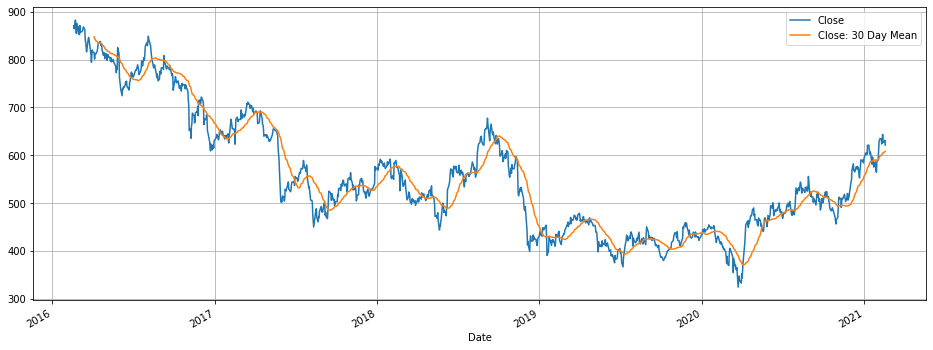

In [13]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))
plt.grid()

<AxesSubplot:xlabel='Date'>

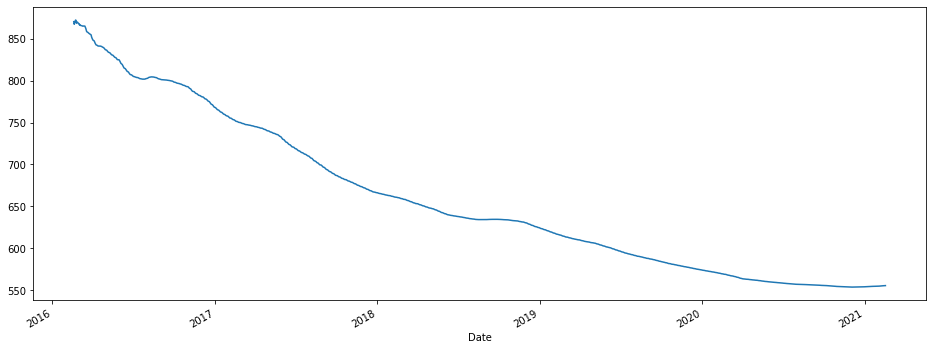

In [14]:
# Optional specify a minimum number of periods
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))


In [15]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
# Feature Scaling

sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1145):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [19]:
X_train

array([[[0.97284106],
        [0.97408365],
        [0.97683503],
        ...,
        [0.85089199],
        [0.84725306],
        [0.84379161]],

       [[0.97408365],
        [0.97683503],
        [0.99946749],
        ...,
        [0.84725306],
        [0.84379161],
        [0.84538923]],

       [[0.97683503],
        [0.99946749],
        [0.96689443],
        ...,
        [0.84379161],
        [0.84538923],
        [0.83669122]],

       ...,

       [[0.30948789],
        [0.31587825],
        [0.31996094],
        ...,
        [0.36274075],
        [0.34516727],
        [0.34250462]],

       [[0.31587825],
        [0.31996094],
        [0.29528713],
        ...,
        [0.34516727],
        [0.34250462],
        [0.36096566]],

       [[0.31996094],
        [0.29528713],
        [0.28046507],
        ...,
        [0.34250462],
        [0.36096566],
        [0.34303724]]])

In [20]:
X_train.shape

(1085, 60, 1)

In [21]:
y_train

array([0.84538923, 0.83669122, 0.82426556, ..., 0.36096566, 0.34303724,
       0.34143961])

In [22]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout



In [23]:
# Initialising the RNN
regressor = Sequential()



In [24]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [25]:
regressor

In [27]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = "accuracy")

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
34/34 [==============================] - 3s 93ms/step - loss: 0.0080 - accuracy: 9.2166e-04
Epoch 2/100
34/34 [==============================] - 3s 91ms/step - loss: 0.0055 - accuracy: 9.2166e-04
Epoch 3/100
34/34 [==============================] - 3s 79ms/step - loss: 0.0047 - accuracy: 9.2166e-04
Epoch 4/100
34/34 [==============================] - 3s 79ms/step - loss: 0.0049 - accuracy: 9.2166e-04
Epoch 5/100
34/34 [==============================] - 3s 78ms/step - loss: 0.0048 - accuracy: 9.2166e-04
Epoch 6/100
34/34 [==============================] - 3s 77ms/step - loss: 0.0044 - accuracy: 9.2166e-04
Epoch 7/100
34/34 [==============================] - 3s 75ms/step - loss: 0.0043 - accuracy: 9.2166e-04
Epoch 8/100
34/34 [==============================] - 3s 75ms/step - loss: 0.0037 - accuracy: 9.2166e-04
Epoch 9/100
34/34 [==============================] - 3s 75ms/step - loss: 0.0033 - accuracy: 9.2166e-04
Epoch 10/100
34/34 [==============================] - 3s 75ms/st

In [45]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('SunPharma_3.csv',index_col="Date",parse_dates=True)



In [46]:
real_stock_price = dataset_test.iloc[:21, 1:2].values

In [47]:
real_stock_price

array([[876.5     ],
       [870.400024],
       [885.799988],
       [898.450012],
       [870.      ],
       [880.      ],
       [890.      ],
       [880.799988],
       [873.      ],
       [877.099976],
       [873.849976],
       [874.5     ],
       [871.      ],
       [863.700012],
       [868.      ],
       [870.      ],
       [876.549988],
       [861.5     ],
       [847.450012],
       [843.900024],
       [825.900024]])

In [48]:
real_stock_price = pd.DataFrame(real_stock_price)
real_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
dtypes: float64(1)
memory usage: 296.0 bytes


In [49]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-02-18,869.700012,876.500000,858.099976,870.450012,840.284668,2342525.0
2016-02-19,870.400024,870.400024,857.000000,864.200012,834.251343,1561649.0
2016-02-22,871.950012,885.799988,868.000000,882.450012,851.868835,2302969.0
2016-02-23,884.700012,898.450012,866.250000,871.099976,840.912170,2470030.0
2016-02-24,866.349976,870.000000,849.599976,854.549988,824.935608,1716644.0


In [50]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2016-02-18 to 2021-02-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   float64
dtypes: float64(6)
memory usage: 67.5 KB


In [51]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [52]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2016-02-18 to 2021-02-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1232 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [53]:
# Getting the predicted stock price of 2016
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [54]:
predicted_stock_price

array([[628.50305],
       [761.51514],
       [834.40656],
       [845.5882 ],
       [847.6468 ],
       [839.22534],
       [834.11847],
       [852.82916],
       [861.23676],
       [852.3058 ],
       [856.2797 ],
       [850.2781 ],
       [854.42816],
       [850.0096 ],
       [847.7431 ],
       [850.06647],
       [845.9337 ],
       [852.1261 ],
       [851.07513],
       [840.7576 ]], dtype=float32)

In [55]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


In [56]:
A = predicted_stock_price.values.tolist()



In [57]:
real_stock_price = pd.DataFrame(real_stock_price)
real_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       21 non-null     float64
dtypes: float64(1)
memory usage: 296.0 bytes


In [58]:
real_stock_price

,0
0,876.500000
1,870.400024
2,885.799988
3,898.450012
4,870.000000
5,880.000000
6,890.000000
7,880.799988
8,873.000000
9,877.099976


In [59]:
#B = real_stock_price.tolist()


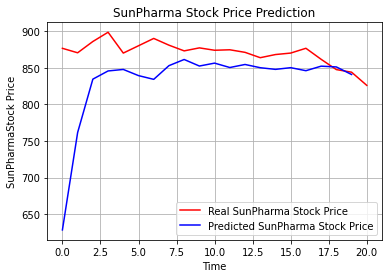

In [67]:

# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real SunPharma Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SunPharma Stock Price')

plt.grid()
plt.title('SunPharma Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SunPharmaStock Price')
plt.legend()

plt.show()
